<a href="https://colab.research.google.com/github/i-johnvictor/ml_with_tensorflow/blob/main/03_tf_cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# A convolution is a filter that passes over an image, processes it, and extracts the important features.

# Let's say you have an image of a person wearing a sneaker. How would you detect that a sneaker is present in the image?
# In order for your program to "see" the image as a sneaker, you'll have to extract the important features, and blur the inessential features.
# This is called feature mapping.

# The feature mapping process is theoretically simple. You'll scan every pixel in the image and then look at its neighboring pixels.
# You multiply the values of those pixels by the equivalent weights in a filter.

# Lets use acsent images from scipy library

import tensorflow as tf
import scipy.datasets
import numpy as np

In [4]:
i = scipy.datasets.ascent()

In [6]:
print(i.shape)

(512, 512)


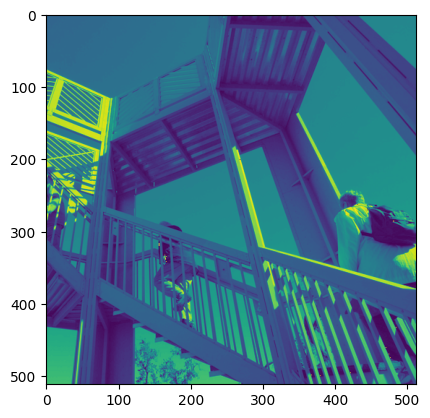

In [7]:
# As you can see the shape is 512X512 image. Let's plot one image and see
import matplotlib.pyplot as plt
plt.imshow(i)

In [8]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

In [11]:
print(size_x, size_y)

512 512


In [16]:
# Now let's make a 3X3 kernel/matrix for applying a filter to this image and see the behaviour
# This filter detects edges nicely
# It creates a filter that only passes through sharp edges and straight lines.
# Experiment with different values for fun effects.
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]
# A couple more filters to try for fun!
# filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
 # If all the digits in the filter don't add up to 0 or 1, you
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
# You specify weight to ensure that if you add all the values within a set, that output should be normalized based on your weight
weight  = .1

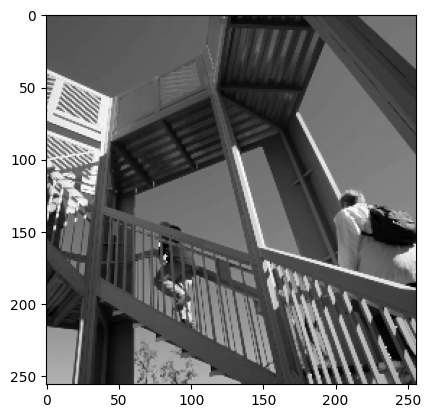

In [18]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    pixels.sort(reverse=True)
    newImage[int(x/2),int(y/2)] = pixels[0]

# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()

In [ ]:
# The observations above are
# 1. We have successfully managed to reduce the image size from 512 to 256 without losing features. This is called feature mapping
# 2. MaxPooling is a technique where you compare the pixel value of with it's neighbours (right, botttom and bottom right) and pick the pixel value that is highest.
# Hence the name MaxPooling
# The above looping of pixels is only for my understanding